In [1]:
#import all the required libraries 
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [7]:
#import dataset & select the required data
dta = pd.read_csv("batadal.csv")
dta = dta.iloc[:,1:43]

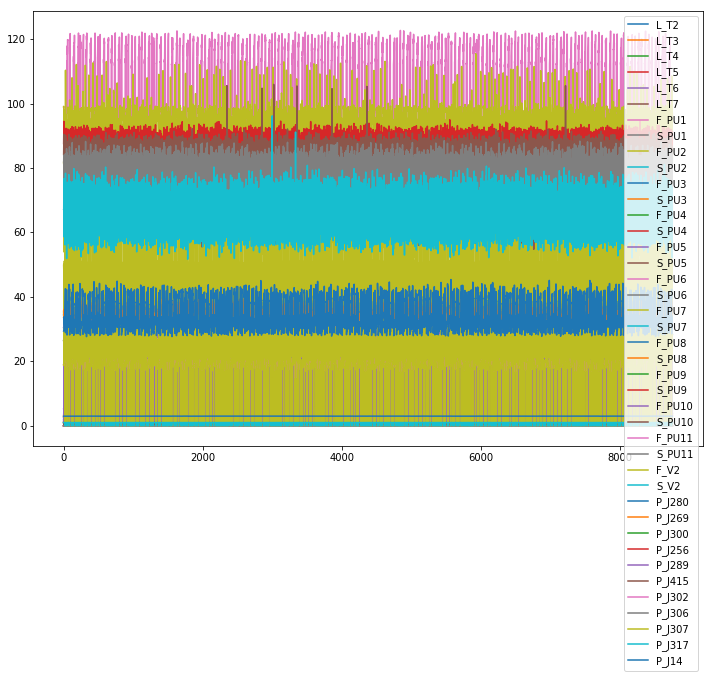

In [3]:
#plot dataset to visulaize and understand it 
%matplotlib inline
dta.plot(figsize=(12,8));

In [8]:
#compute the DW index to understand the auto-correlation in the dataset and understand the behaviour 
sm.stats.durbin_watson(dta)

C:\Users\chitra\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:47: RuntimeWarning: invalid value encountered in true_divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


array([6.43217162e-03, 1.64023651e-02, 7.95066170e-03, 1.63519679e-02,
       2.93353248e-02, 8.82569557e-04, 3.92116089e-02, 2.18976738e-03,
       0.00000000e+00, 5.44021566e-02, 5.46789564e-02,            nan,
                  nan, 3.99373463e-01, 3.94487976e-01,            nan,
                  nan, 8.72198011e-01, 8.75000000e-01, 2.50183242e-01,
       2.50944414e-01, 3.26681490e-01, 3.25786646e-01,            nan,
                  nan, 2.61046587e-01, 2.59722027e-01, 1.00952208e+00,
       1.00000000e+00, 1.26963523e-01, 9.48653726e-02, 9.40874892e-07,
       6.35913844e-03, 3.97154417e-03, 8.25106998e-03, 3.93163890e-03,
       1.53769601e-02, 2.26430605e-02, 1.52030234e-02, 2.31296551e-02,
       9.70949079e-03, 6.75715167e-03])

In [5]:
from pandas.tools.plotting import autocorrelation_plot

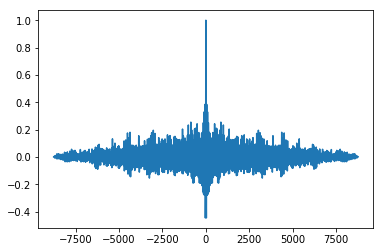

C:\Users\chitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys


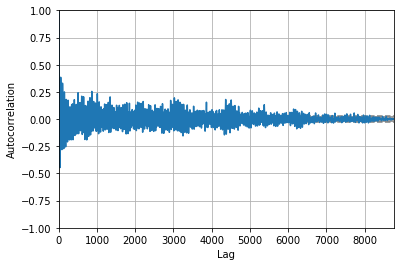

In [9]:
# show plots in the notebook for autocorrelation among data 
%matplotlib inline
dta['SUNACTIVITY_2'] = dta['L_T1']
dta['SUNACTIVITY_2'] = (dta['SUNACTIVITY_2'] - dta['SUNACTIVITY_2'].mean()) / (dta['SUNACTIVITY_2'].std())
plt.acorr(dta['SUNACTIVITY_2'],maxlags = len(dta['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['L_T1'])
plt.show()

In [10]:
# run the arma model for any of the sensor and use the corresponding order from report 
arma_mod20 = sm.tsa.ARMA(dta['L_T1'], (1,9)).fit()
print(arma_mod20.params)

const         2.674712
ar.L1.L_T1    0.852895
ma.L1.L_T1    1.140323
ma.L2.L_T1    1.020393
ma.L3.L_T1    0.896591
ma.L4.L_T1    0.787106
ma.L5.L_T1    0.693938
ma.L6.L_T1    0.546187
ma.L7.L_T1    0.366472
ma.L8.L_T1    0.167278
ma.L9.L_T1    0.034182
dtype: float64


In [11]:
#perform the dw test again 
sm.stats.durbin_watson(dta['L_T1'])

0.006432171620535719

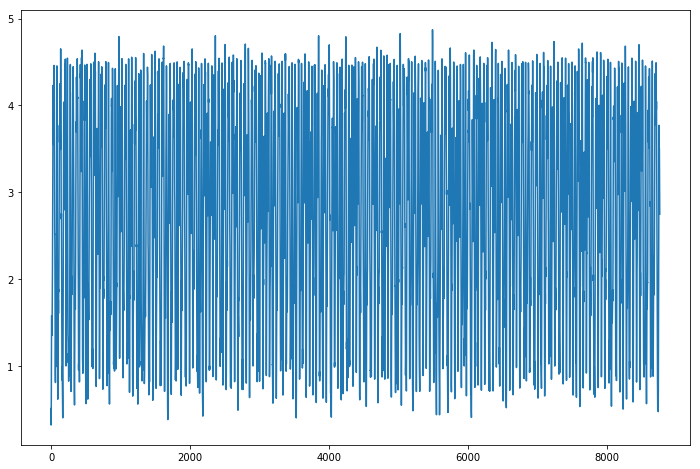

In [12]:
# show plots in the notebook of the raw data 
%matplotlib inline
dta['L_T1'].plot(figsize=(12,8));

In [13]:
sm.stats.durbin_watson(dta['L_T1'])

0.006432171620535719

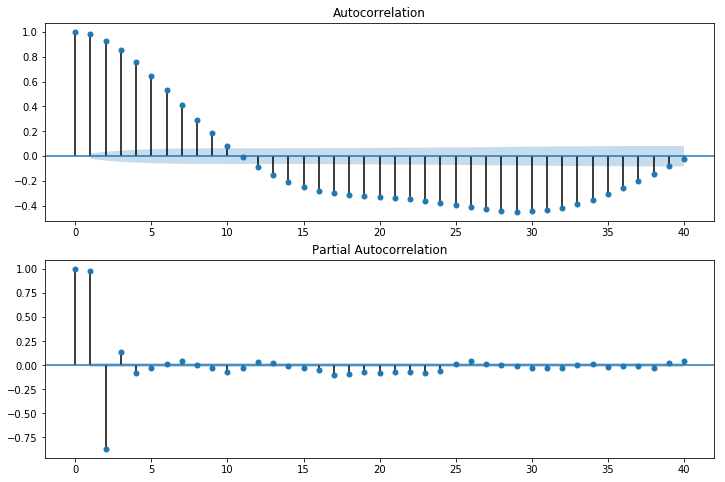

In [14]:
# show plots in the notebook 
#perform another auto correlation and partial autocorrelation to understand lags
%matplotlib inline
sen = dta['L_T1']
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sen.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sen, lags=40, ax=ax2)

In [15]:
#get the bic, aic and hqic at their minimum values
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

-13185.628322153989 -13100.691538161993 -13156.687655734282


In [16]:
sm.stats.durbin_watson(arma_mod20.resid.values)

1.9546843341072921

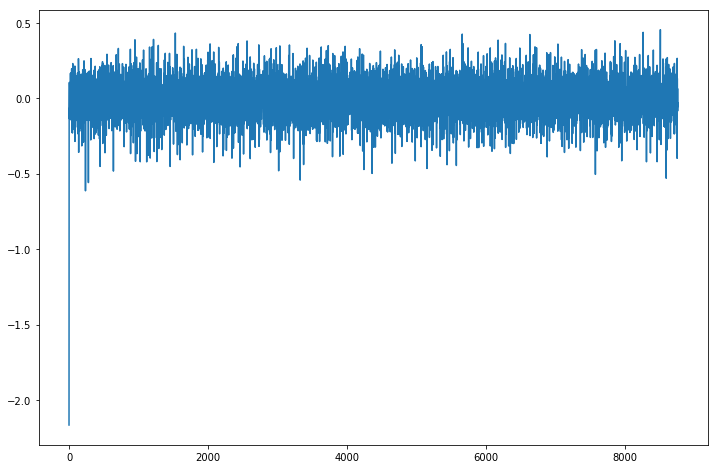

In [17]:
# show plots in the notebook 
#commpute and plot the residuals in the dataset
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [18]:
resid20 = arma_mod20.resid

In [19]:
stats.normaltest(resid20)

NormaltestResult(statistic=2821.3298252293107, pvalue=0.0)

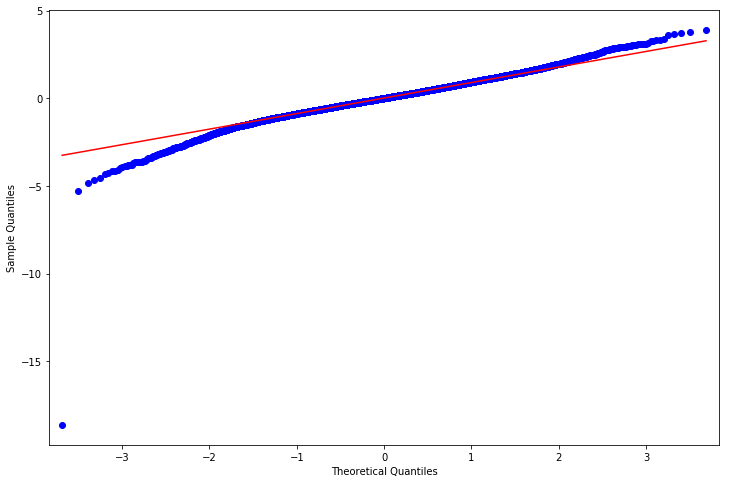

In [20]:
# show plots in the notebook
#a qqplot for the residuals 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

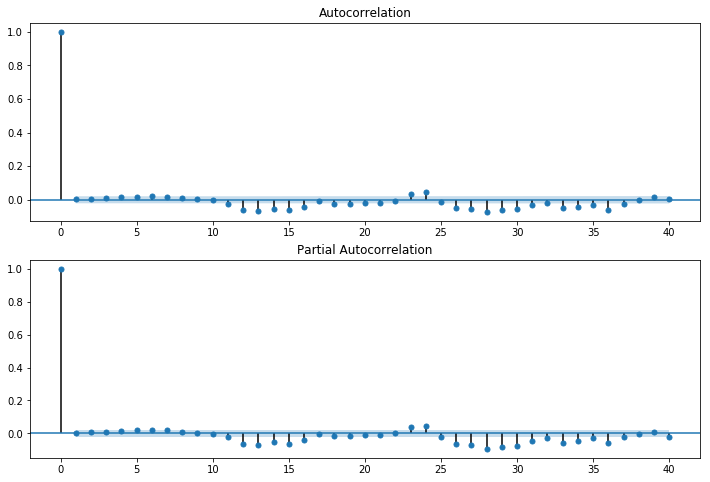

In [21]:
%matplotlib inline
#re compute ARMA after the removal of residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [22]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.002819    0.069648  7.918499e-01
2.0   0.004430    0.241622  8.862016e-01
3.0   0.008913    0.938022  8.162440e-01
4.0   0.015960    3.171051  5.296194e-01
5.0   0.019455    6.489784  2.614326e-01
6.0   0.019997    9.996391  1.248041e-01
7.0   0.018928   13.138361  6.880815e-02
8.0   0.010334   14.075008  7.983118e-02
9.0   0.005220   14.314011  1.115855e-01
10.0 -0.000469   14.315938  1.590623e-01
11.0 -0.024083   19.404726  5.420432e-02
12.0 -0.061826   52.946726  4.210239e-07
13.0 -0.069722   95.608692  1.170854e-14
14.0 -0.054399  121.581816  3.082048e-19
15.0 -0.063300  156.753940  1.092635e-25
16.0 -0.040623  171.241088  4.760461e-28
17.0 -0.007552  171.741786  1.266401e-27
18.0 -0.026800  178.048744  2.334186e-28
19.0 -0.023893  183.062249  7.710205e-29
20.0 -0.019652  186.454351  5.267752e-29
21.0 -0.019573  189.819403  3.602524e-29
22.0 -0.006967  190.245831  9.107222e-29
23.0  0.034872  

In [24]:
#perform a prediction on the dataset. U can use ARMA function instead of ARIMA here. 
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

#predict.csv consists of 2500 values as it is faster to compute and easier to visualize.
series = pd.read_csv('predict.csv')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,9))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=2.107483, expected=2.011927
predicted=2.083585, expected=2.434190
predicted=2.862146, expected=2.755921
predicted=2.981093, expected=2.998115
predicted=3.161131, expected=3.206816
predicted=3.352272, expected=3.364015
predicted=3.457710, expected=3.484282
predicted=3.533209, expected=3.676760
predicted=3.827409, expected=3.942388
predicted=4.120061, expected=3.925336
predicted=3.803559, expected=4.074519
predicted=4.228479, expected=4.289539
predicted=4.434861, expected=4.455072
predicted=4.533124, expected=4.445798
predicted=4.350559, expected=4.368377
predicted=4.254030, expected=4.232111
predicted=4.062977, expected=3.936974
predicted=3.642675, expected=3.570208
predicted=3.226327, expected=3.194953
predicted=2.857537, expected=2.812350
predicted=2.505406, expected=2.463418
predicted=2.203528, expected=2.057504
predicted=1.738813, expected=1.717562
predicted=1.488563, expected=1.465084
predicted=1.323332, expected=1.179273
predicted=0.983521, expected=0.937976
predicted=0.

KeyboardInterrupt: 

In [26]:
#this dataset consists of predict_y variable from above cell and the labels present in the dataset.
pre = pd.read_csv('y_thres.csv')
tp = 1808 #count the number of anomalies + if true anomalies are also present in predicted anomalies then add 1 on every interation.

print("tp = ", tp)
fp = sum((pre.iloc[:,1]-pre.iloc[:,0]) == -1)
print("fp = ",fp)
pre_y = pre.iloc[:,1]
y_tes = pre.iloc[:,0]
tn = sum(pre_y[y_tes==0]==0)
print("tn=",tn)
fn = sum(pre_y[y_tes==1]==0)
print("fn=",fn)
print ('precision:' ,1.0 * tp/(tp+fp))
print ('recall:' ,1.0 * tp/(tp+fn))
print ('Accuracy:  ', 1.0 * (tp+tn)/(tp+fp+tn+fn))

tp =  1808
fp =  56
tn= 1812
fn= 56
precision: 0.9699570815450643
recall: 0.9699570815450643
Accuracy:   0.969989281886388
